# Seaborn

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## ヒストグラム：sns.distplot()

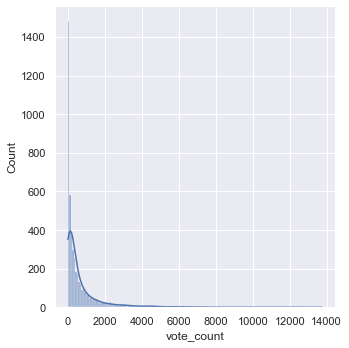

In [26]:
df = pd.read_csv('../dataset/tmdb_5000_movies.csv')
sns.displot(df['vote_count'], kde=True)
sns.set()
plt.show()

## 散布図

### sns.joinplot()

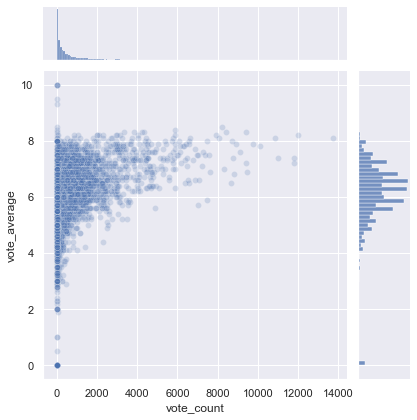

In [28]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

In [29]:
df = df[df['vote_count']> 100]

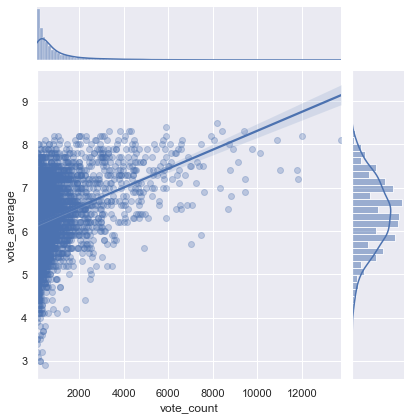

In [33]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': {'alpha': 0.3}})  ## kind入れるときは、alphaの指定が異なる

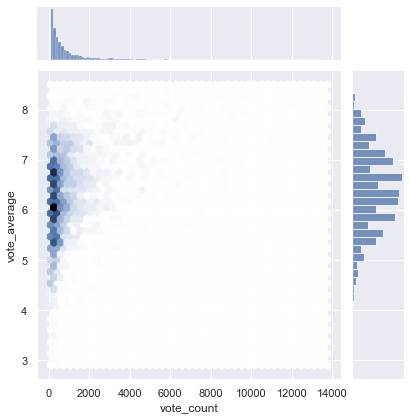

In [34]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='hex')


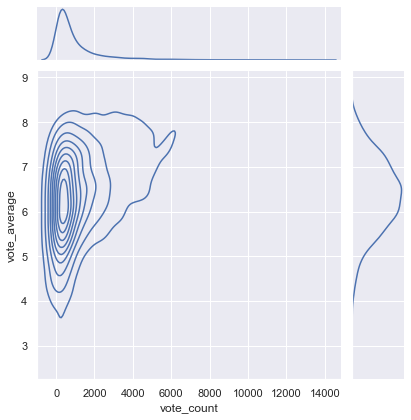

In [37]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')


### sns.pairplot()

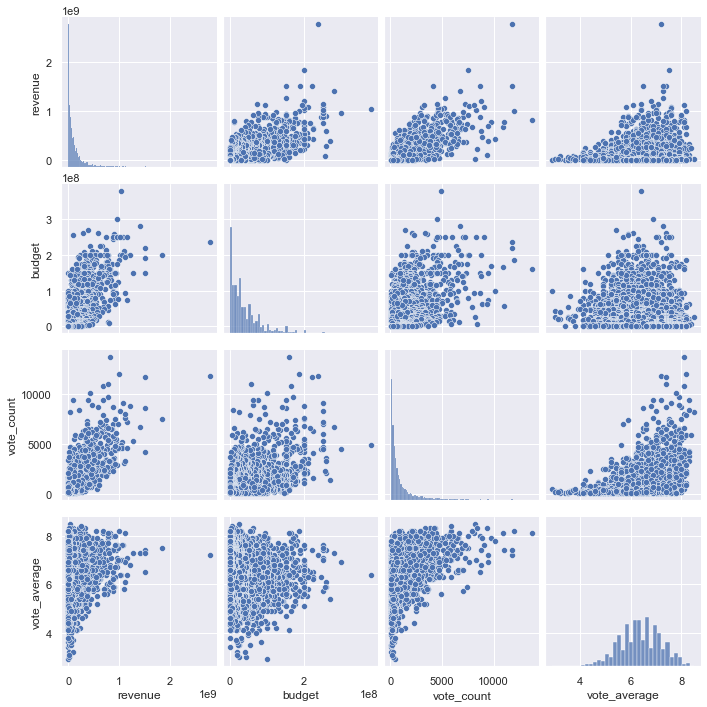

In [39]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

In [40]:
# vote_averageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

In [42]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,low
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,high
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,low


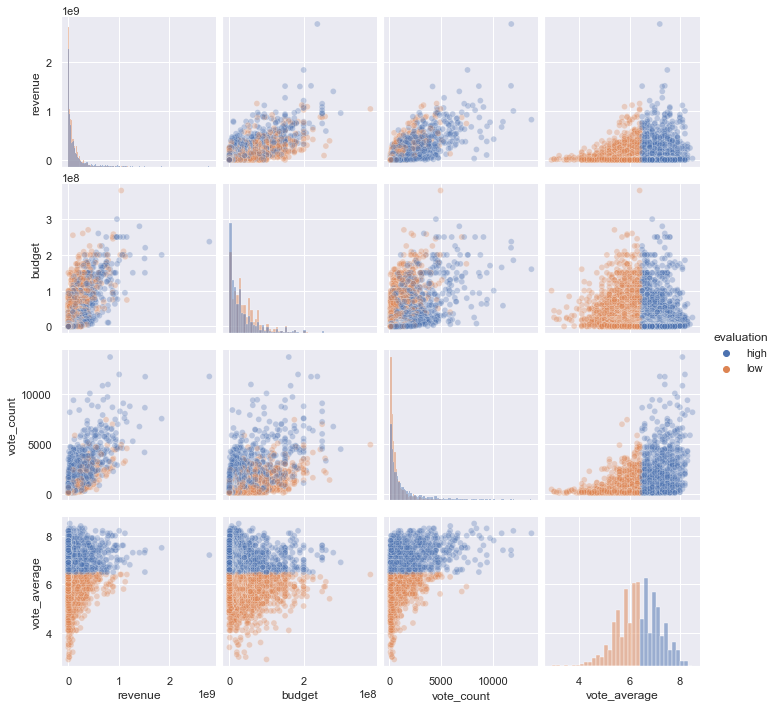

In [44]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation',
             plot_kws={'alpha': 0.3},
             diag_kind='hist')  # 対角線をヒストグラムに

## Categorical Plot

### sns.barplot()
カテゴリごとの集計値(estimatiorで指定)の表示

<AxesSubplot:xlabel='evaluation', ylabel='revenue'>

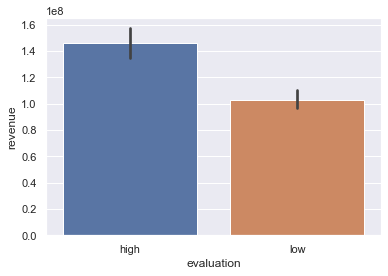

In [45]:
sns.barplot(x='evaluation', y='revenue', data=df)

### sns.countplot()

In [48]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

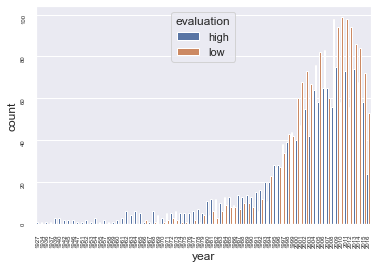

In [52]:
ax = sns.countplot(x='year', data=df.sort_values('year'), hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

In [51]:
# 年代カラム
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
df['decade']

0       2000s
1       2000s
2       2010s
3       2010s
4       2010s
        ...  
4773    1990s
4778    2000s
4788    1970s
4796    2000s
4798    1990s
Name: decade, Length: 3150, dtype: object

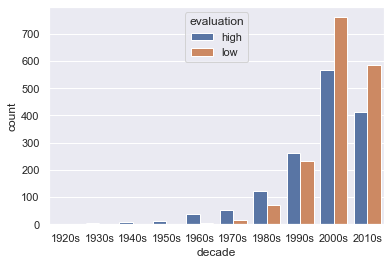

In [53]:
ax = sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

### sns.boxplot()

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

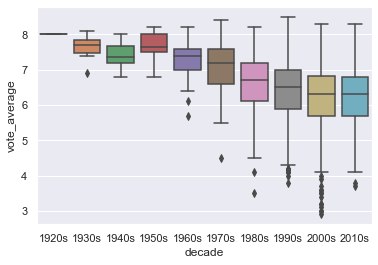

In [54]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.violinplot()

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

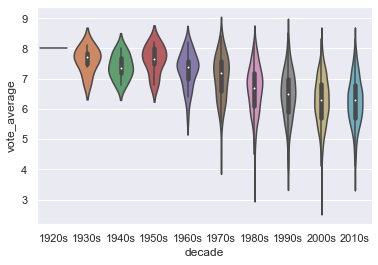

In [55]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.swarmplot()

/Users/kohta/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kohta/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kohta/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kohta/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kohta/opt/anaconda3/lib/python3.8/site-packages/se

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

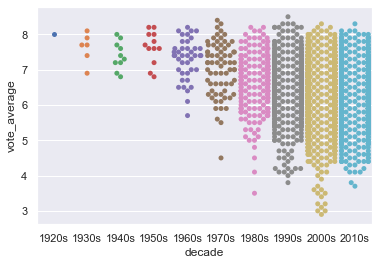

In [56]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

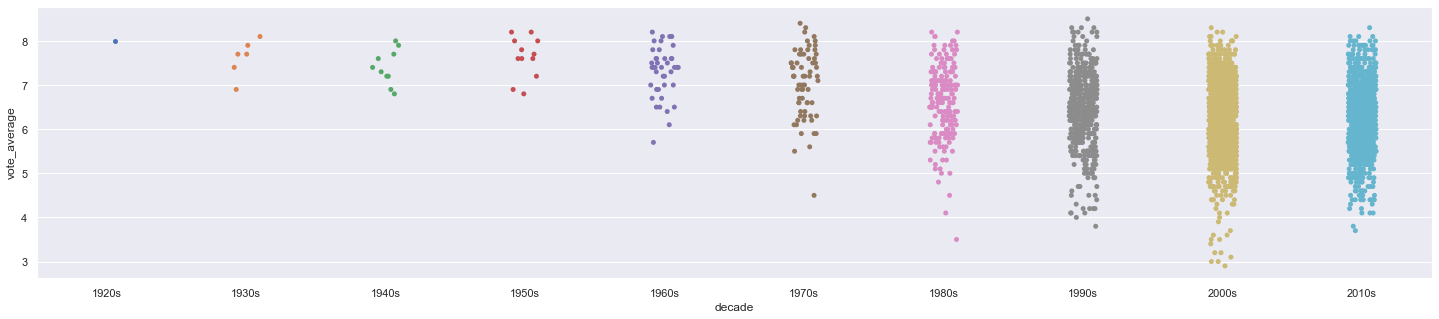

In [58]:
fig, axes = plt.subplots(figsize=(25, 5))
sns.stripplot(ax=axes, x='decade', y='vote_average', data=df.sort_values('decade'))